In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np


In [2]:
x,y=make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=1.5,random_state=1)

In [4]:
x

array([[ -8.73958721,  -8.03183745],
       [ -6.42059297,  -9.0637257 ],
       [ -6.32637735,  -9.17424532],
       [-10.96808754,  -2.60111821],
       [-10.05575577,  -6.37700708],
       [ -8.08707861,  -1.00269592],
       [ -9.88098081,  -3.02577815],
       [ -7.81220253,  -8.61970557],
       [ -8.83835937,  -9.15185988],
       [ -4.95357218,  -7.95957574],
       [ -6.65013323,  -9.25313551],
       [ -7.88354344,  -8.4514849 ],
       [ -9.62451376,  -4.39831028],
       [ -3.98812202,  -7.2747351 ],
       [  0.04109426,   2.75665297],
       [ -8.89449878,  -4.47917513],
       [ -9.25489552,  -4.21540329],
       [ -9.24293528,  -2.01350972],
       [-10.27756716,  -4.10596736],
       [ -2.11886592,   5.64845183],
       [ -7.44615199,  -6.05346219],
       [ -3.31048867,   6.12357543],
       [ -1.47932148,   5.33229453],
       [ -1.99305212,   4.10535277],
       [ -7.55463143, -10.16724179],
       [ -1.20930443,   3.8781151 ],
       [ -1.84389524,   3.00283572],
 

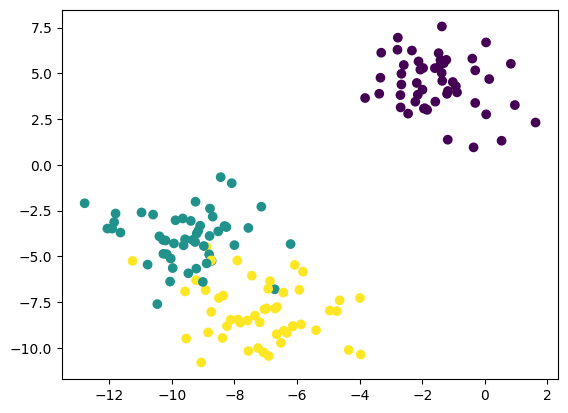

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:

x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [9]:
from sklearn.cluster import KMeans

In [10]:
#Elbow method to select the k values

wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

In [11]:
wcss

[209.9999999999999,
 40.72459653978541,
 20.120793235788117,
 17.784817130738674,
 13.90882006991572,
 12.60037002705305,
 10.081085091698727,
 8.857421908518125,
 7.578461173657322,
 7.127752607481446]

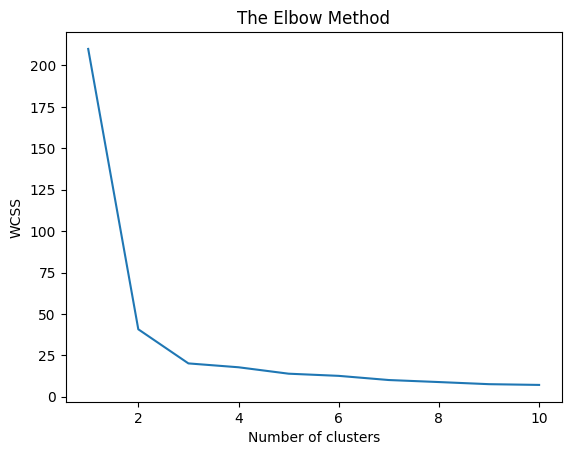

In [12]:
#plt elbow curve
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
 kmeans= kmeans=KMeans(n_clusters=i,init='k-means++')

In [14]:
kmeans.fit_predict(x_train)

array([2, 5, 2, 5, 7, 3, 9, 3, 6, 9, 7, 5, 9, 0, 6, 7, 1, 0, 2, 3, 1, 5,
       1, 7, 2, 2, 1, 6, 5, 3, 9, 8, 4, 9, 1, 3, 3, 3, 2, 4, 3, 6, 5, 2,
       1, 5, 8, 1, 1, 4, 4, 9, 9, 0, 2, 2, 0, 5, 2, 6, 1, 7, 0, 3, 2, 4,
       9, 3, 6, 5, 5, 8, 5, 7, 6, 6, 9, 8, 1, 7, 7, 0, 7, 3, 1, 6, 6, 2,
       7, 2, 1, 3, 5, 1, 0, 4, 4, 2, 4, 9, 6, 4, 9, 8, 4], dtype=int32)

In [15]:
y_pred = kmeans.predict(x_test)

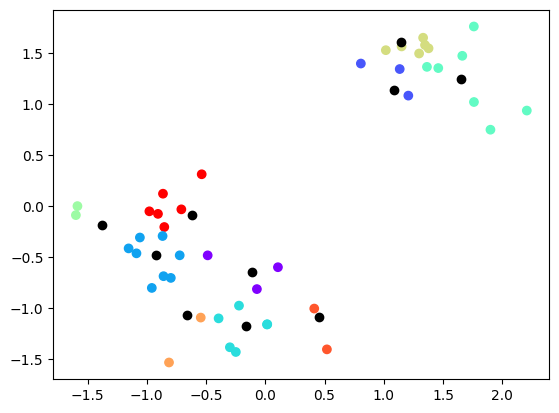

In [16]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.show()

In [19]:
!pip install kneed

In [21]:
from kneed import KneeLocator
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(f"The optimal number of clusters is: {kl.elbow}")

The optimal number of clusters is: 2


In [22]:
kl.elbow

np.int64(2)

In [24]:
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(x_train)
    score=silhouette_score(x_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[np.float64(0.7239791509427926),
 np.float64(0.6013778330094458),
 np.float64(0.4387773545624265),
 np.float64(0.4896885587461021),
 np.float64(0.35450062767072665),
 np.float64(0.35261126650268926),
 np.float64(0.34429227165942833),
 np.float64(0.36046274031758613),
 np.float64(0.35229136209106965)]